GradientBoostingRegressor MSE for PR: 0.39447187233831443


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor MSE for NR: 1788.436995596539
SGDRegressor MSE for SR: 2.1265277844369865e+25
GradientBoostingRegressor MSE for WS: 0.23930730873530917
DecisionTreeRegressor MSE for SFST: 0.42475490641534397
DecisionTreeRegressor MSE for PR_Benefit: 6.589590095238094
SVR MSE for NR_Benefit: 4.612989194408565
Ridge MSE for SR_Benefit: 3.925373532166736
DecisionTreeRegressor MSE for WS_Benefit: 1.7429283640873012
DecisionTreeRegressor MSE for SFST_Benefit: 1.0049697023809525
Best models information saved to best_models_info_all.csv


C:\Users\marcb\AppData\Local\Temp\ipykernel_29136\1632595645.py:274: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(configurations))  # Get a colormap with a distinct color for each feature


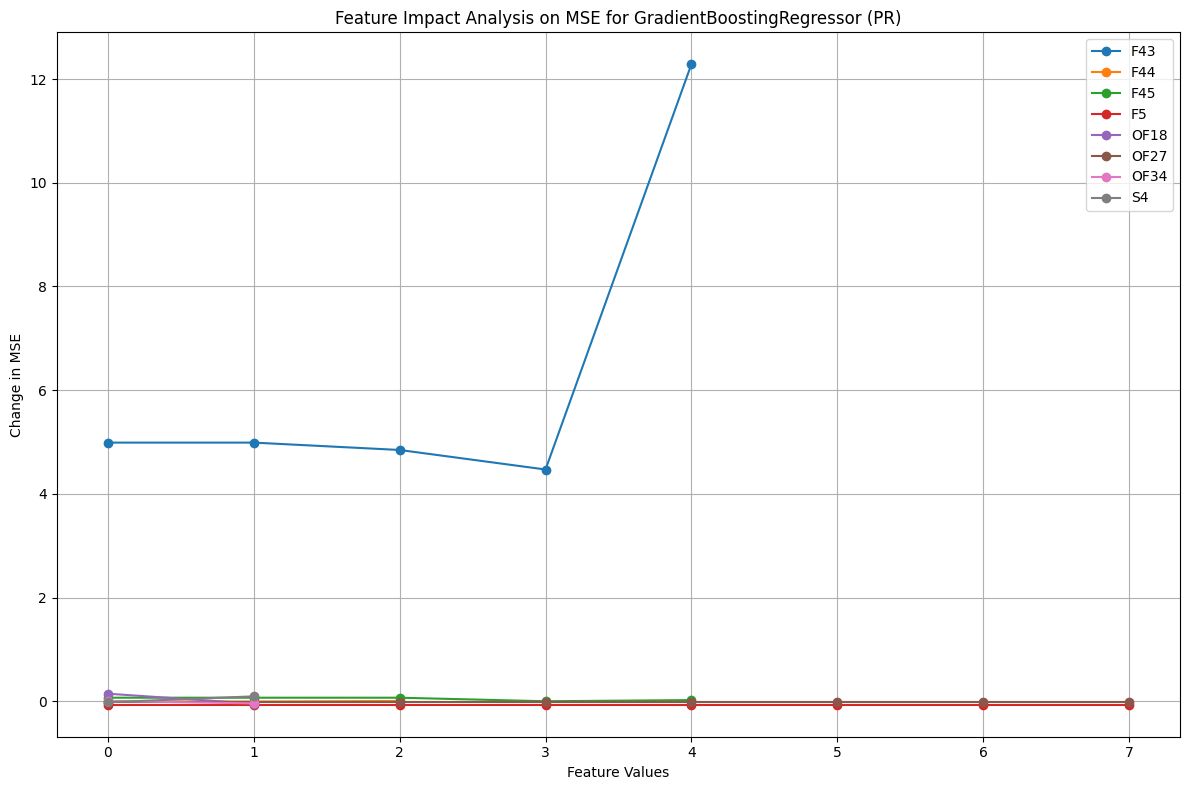

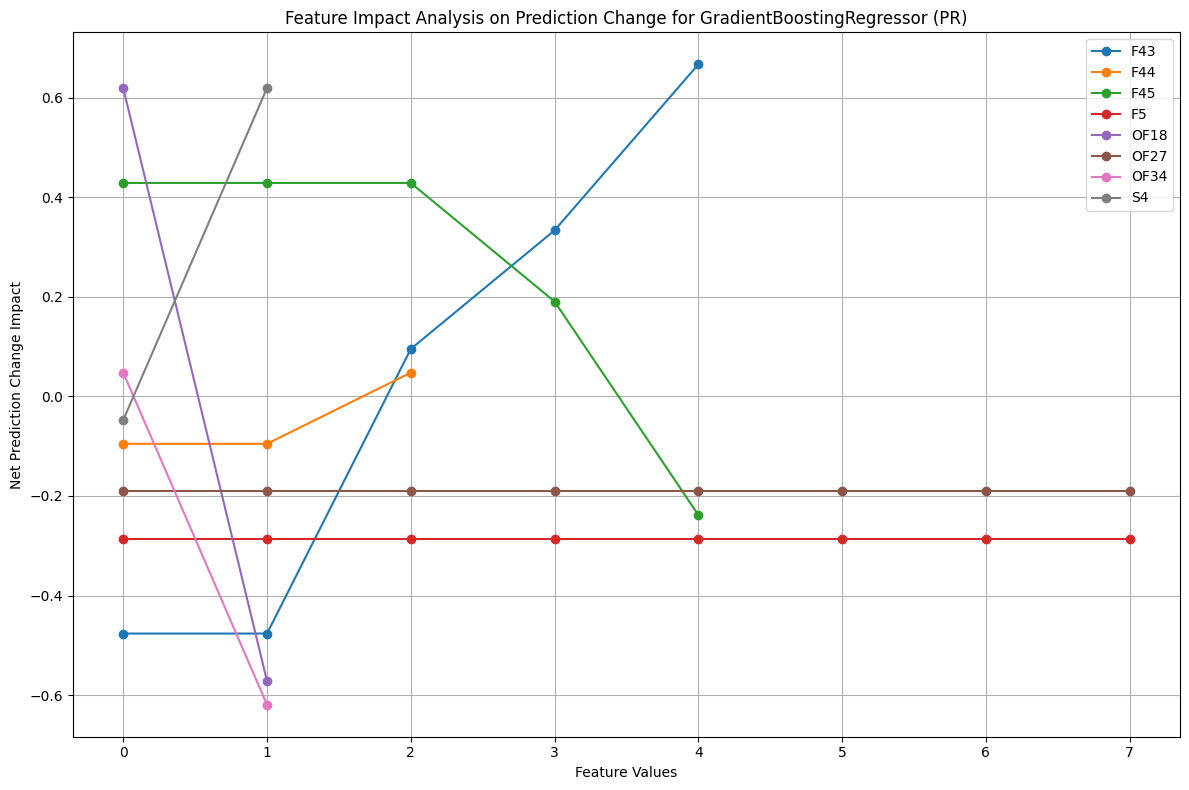

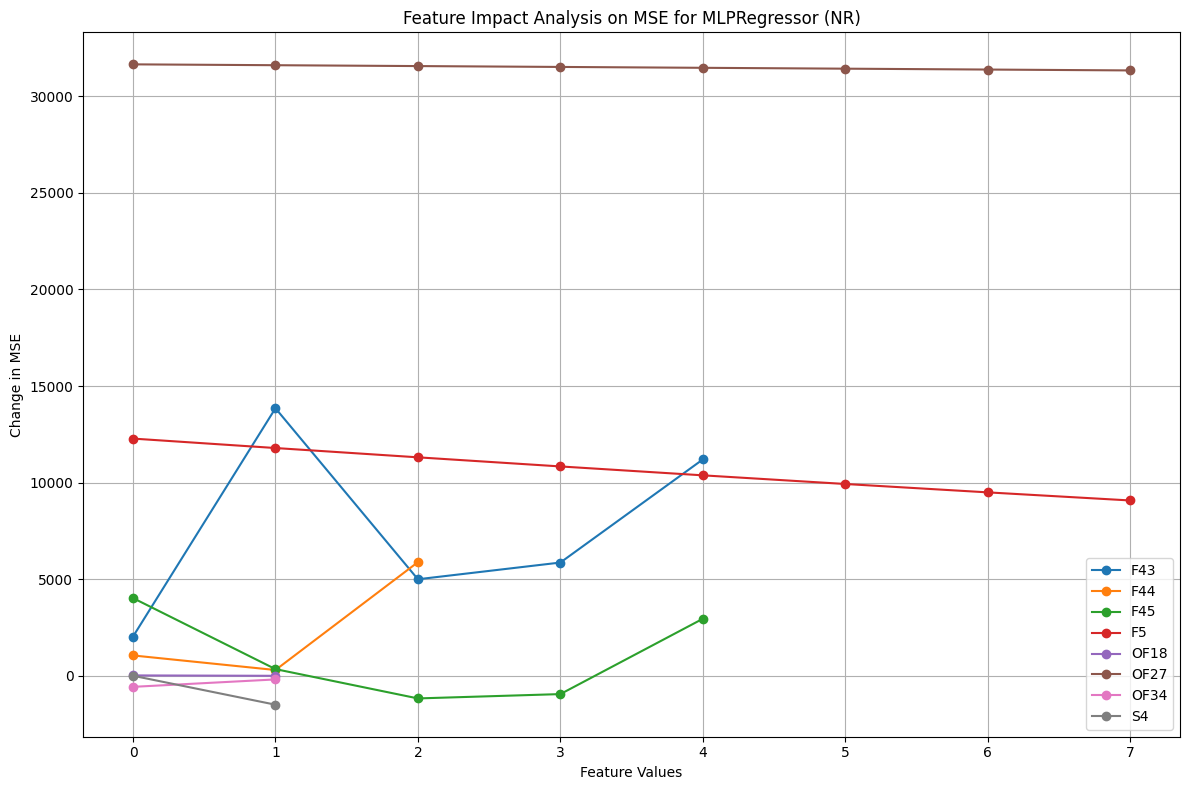

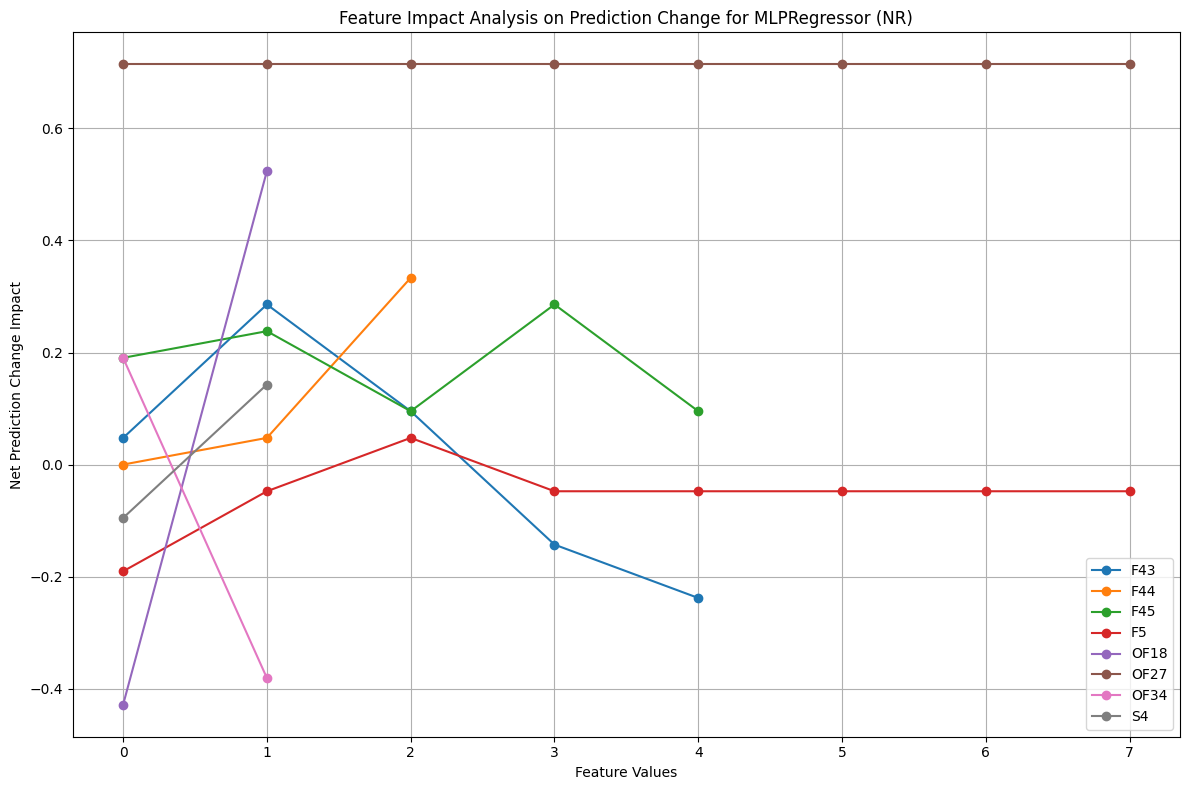

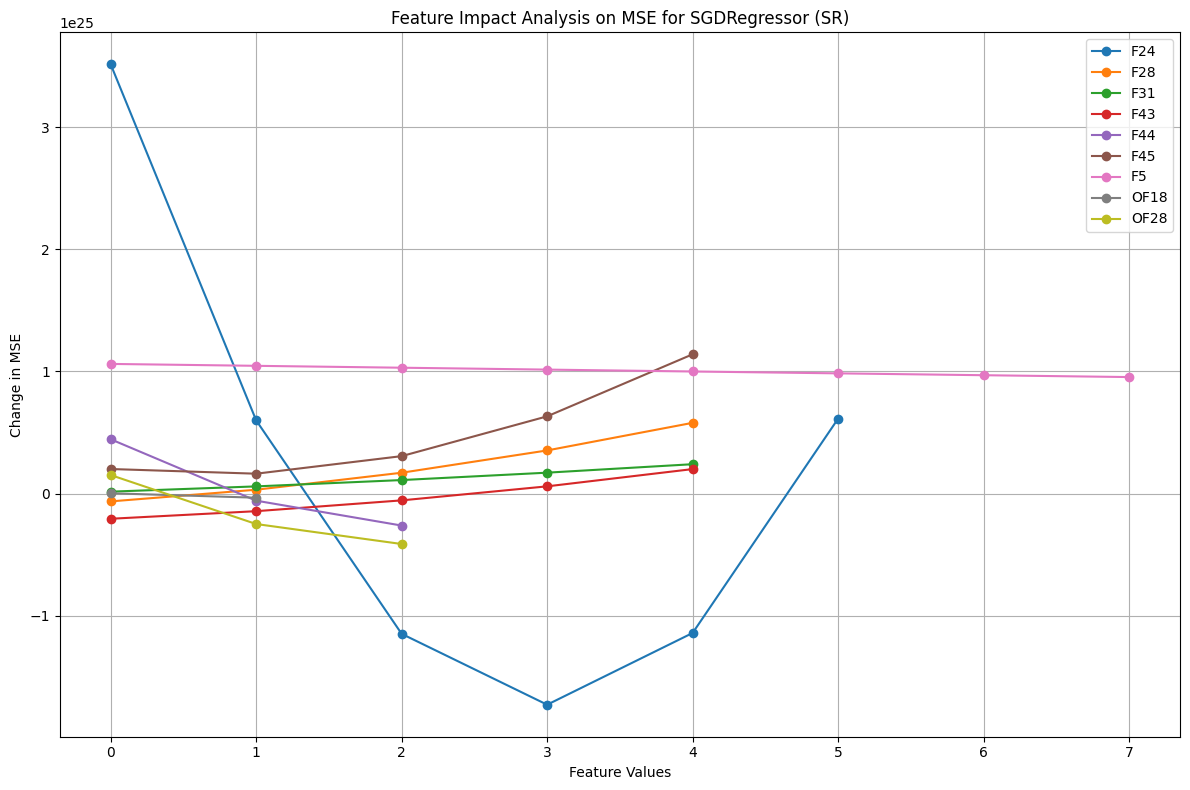

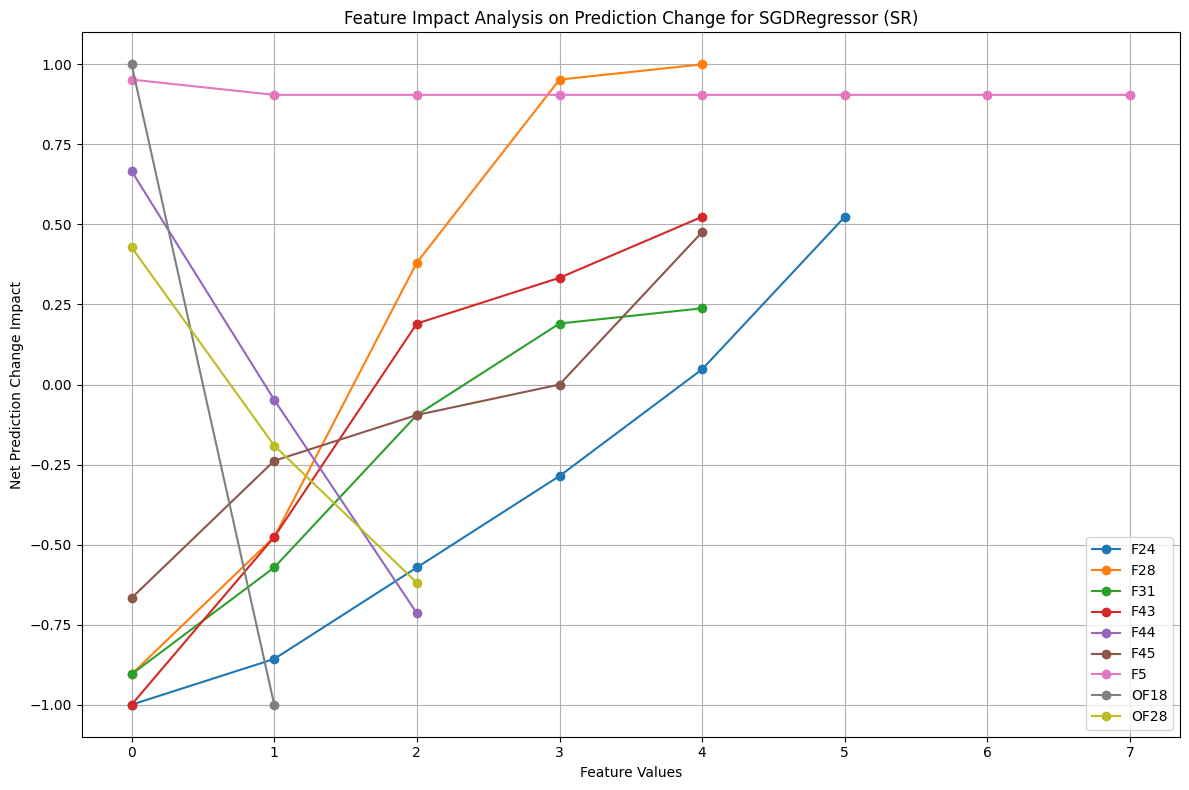

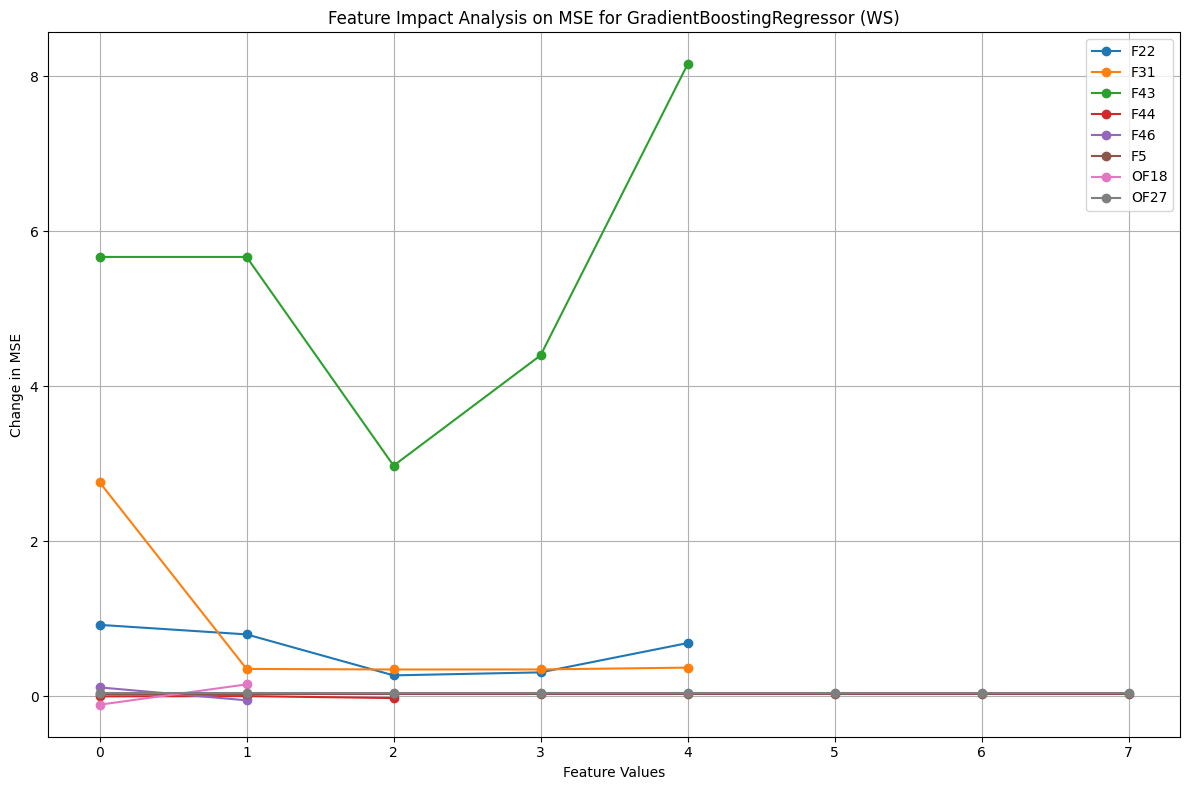

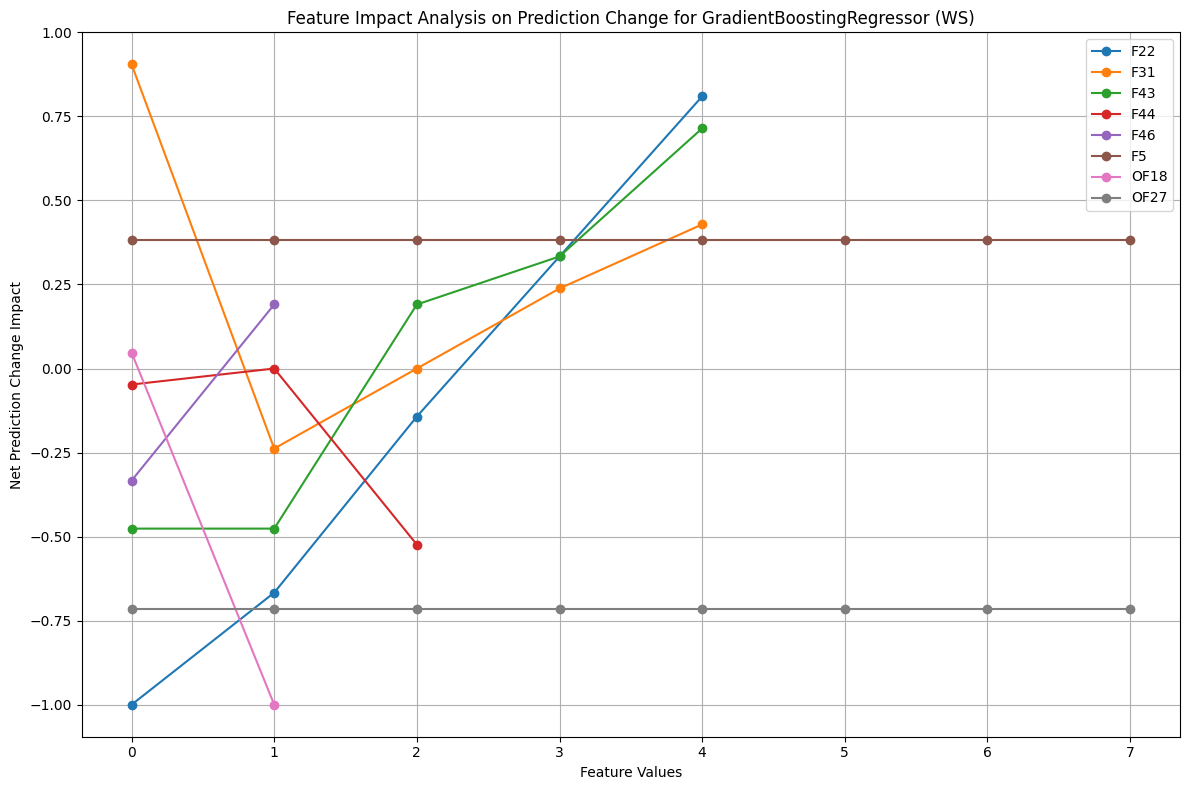

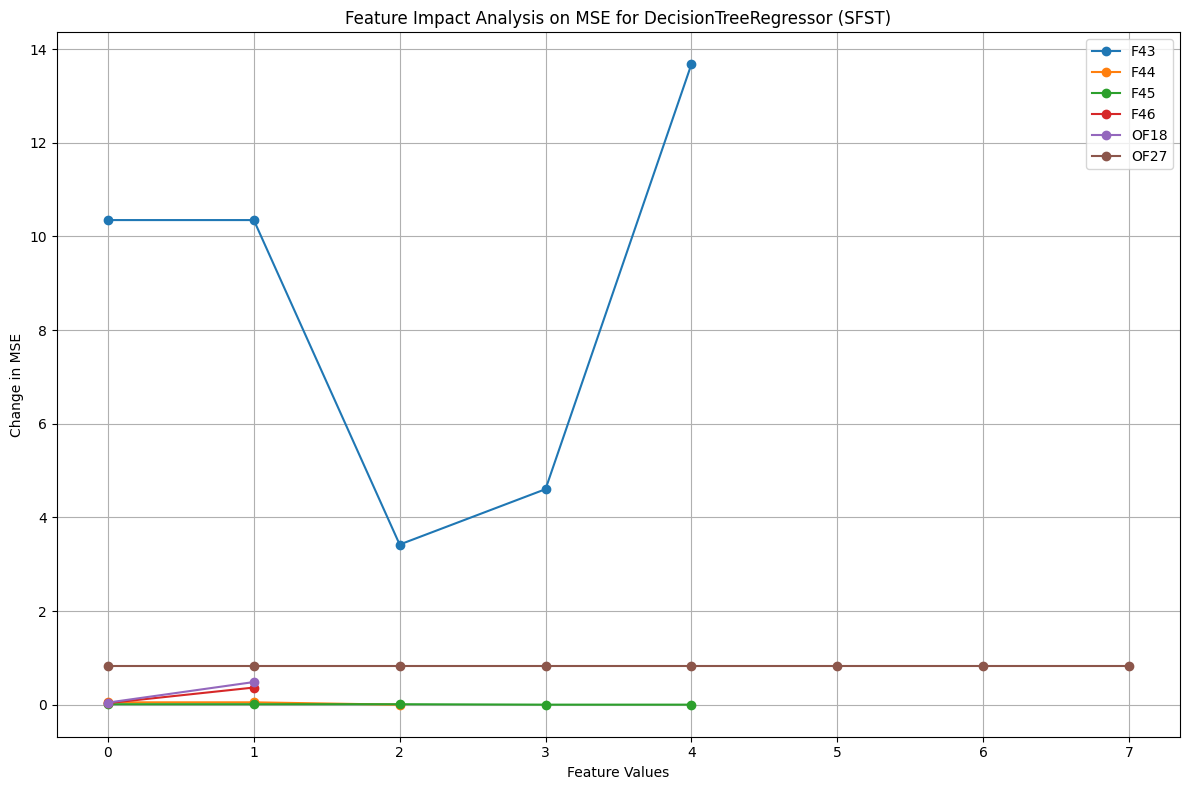

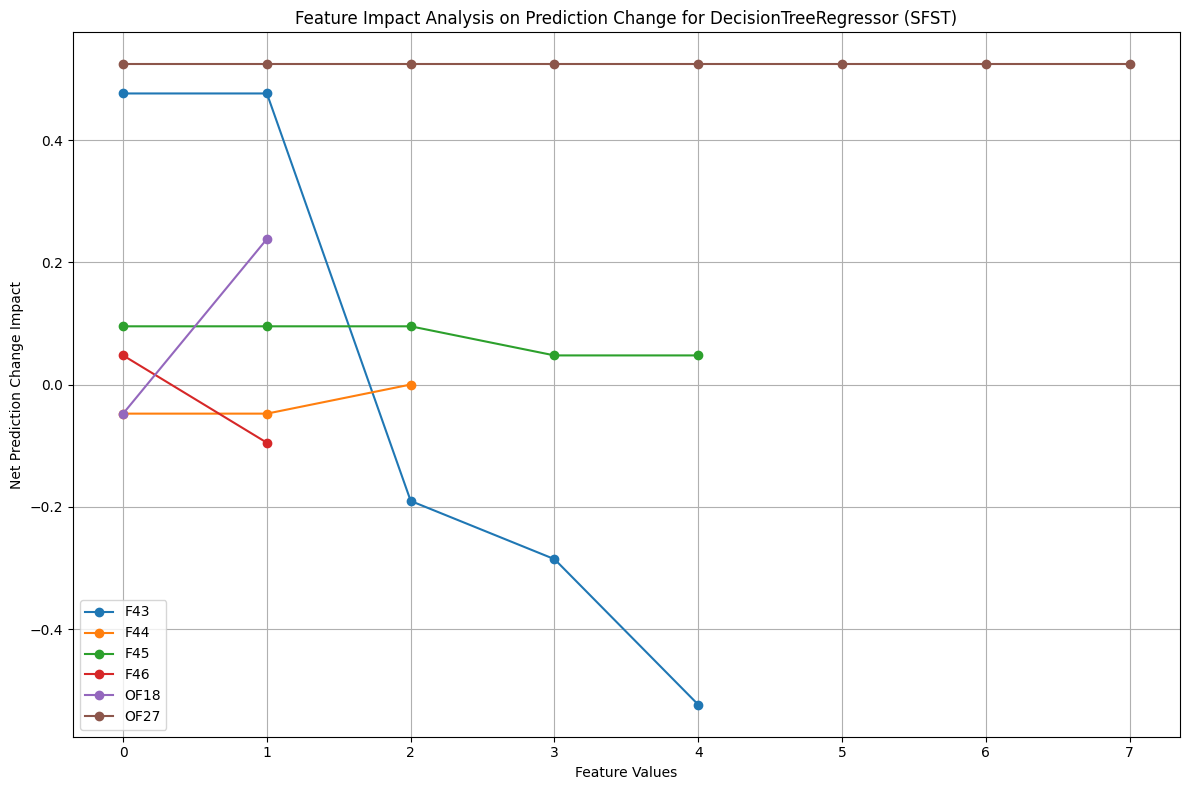

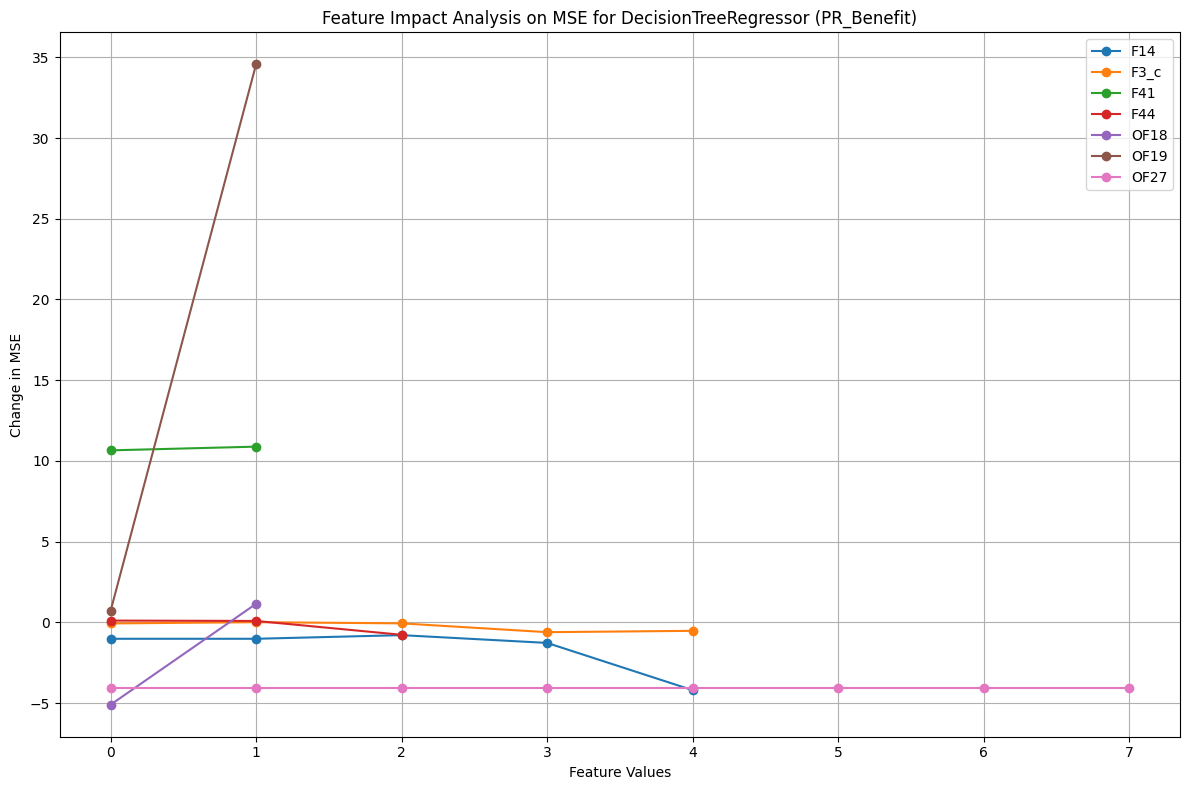

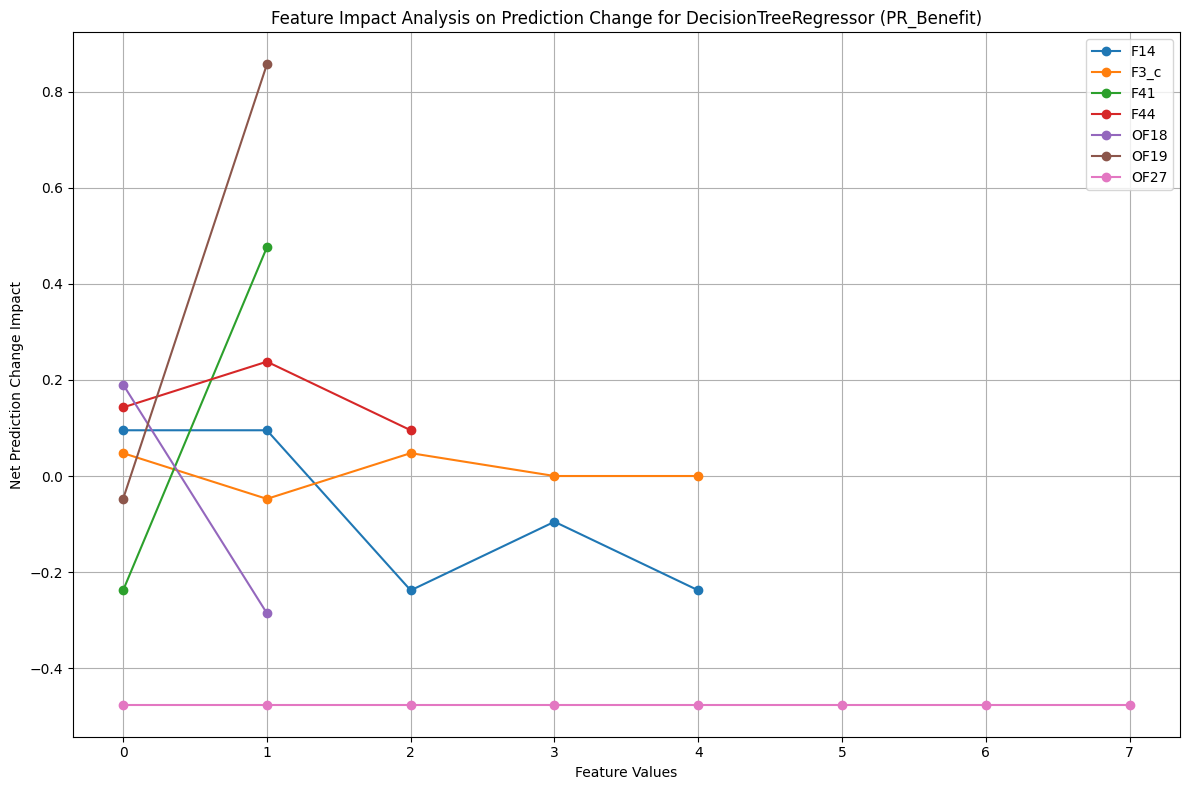

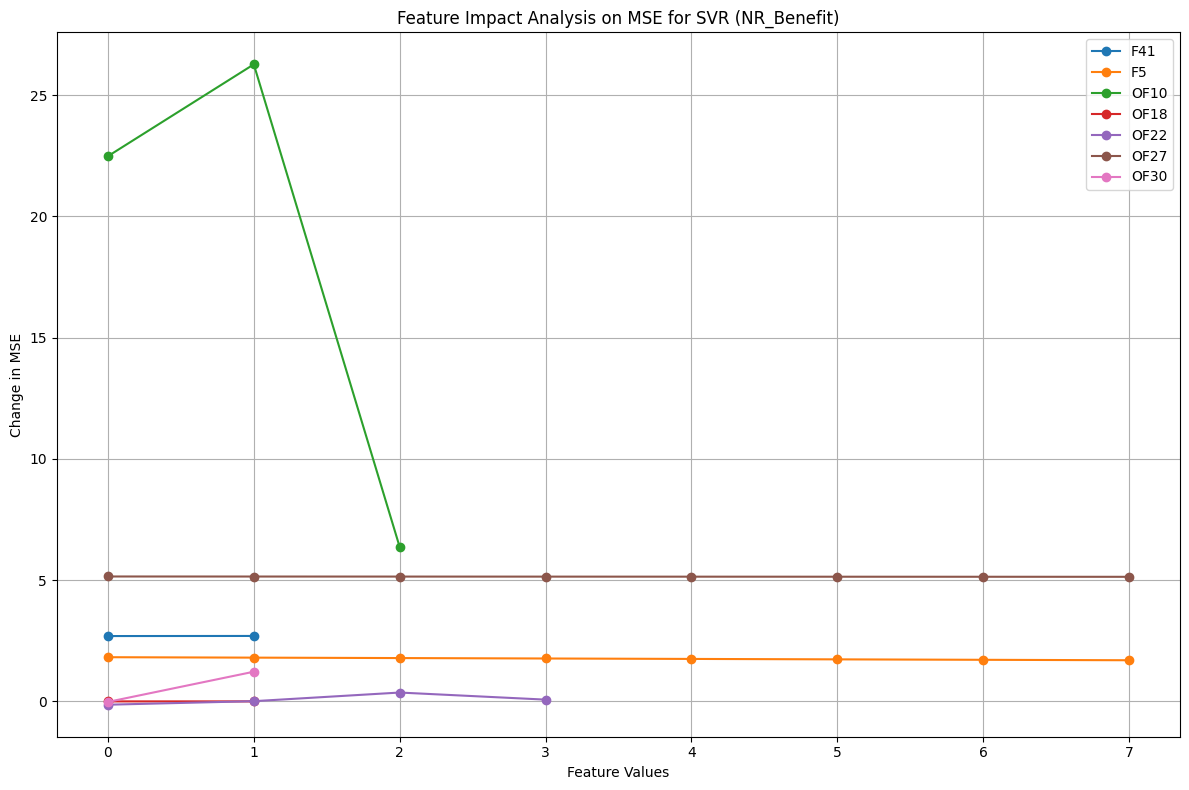

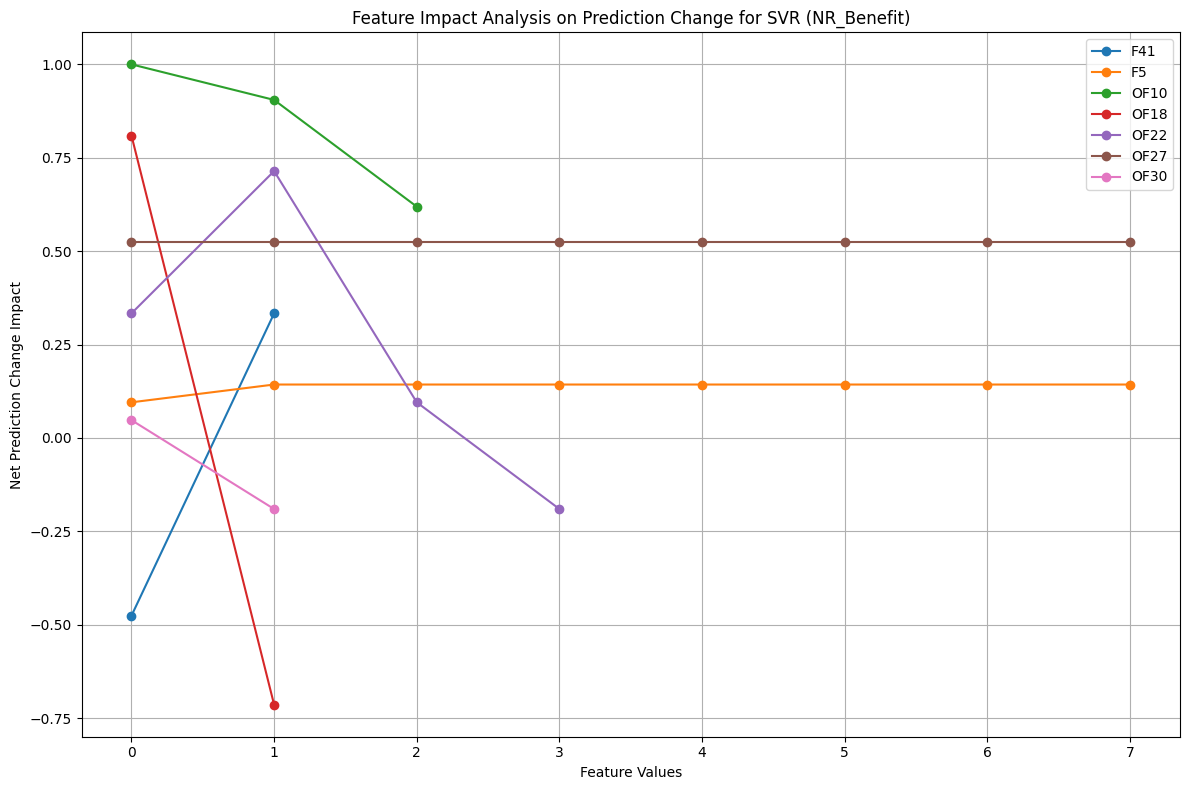

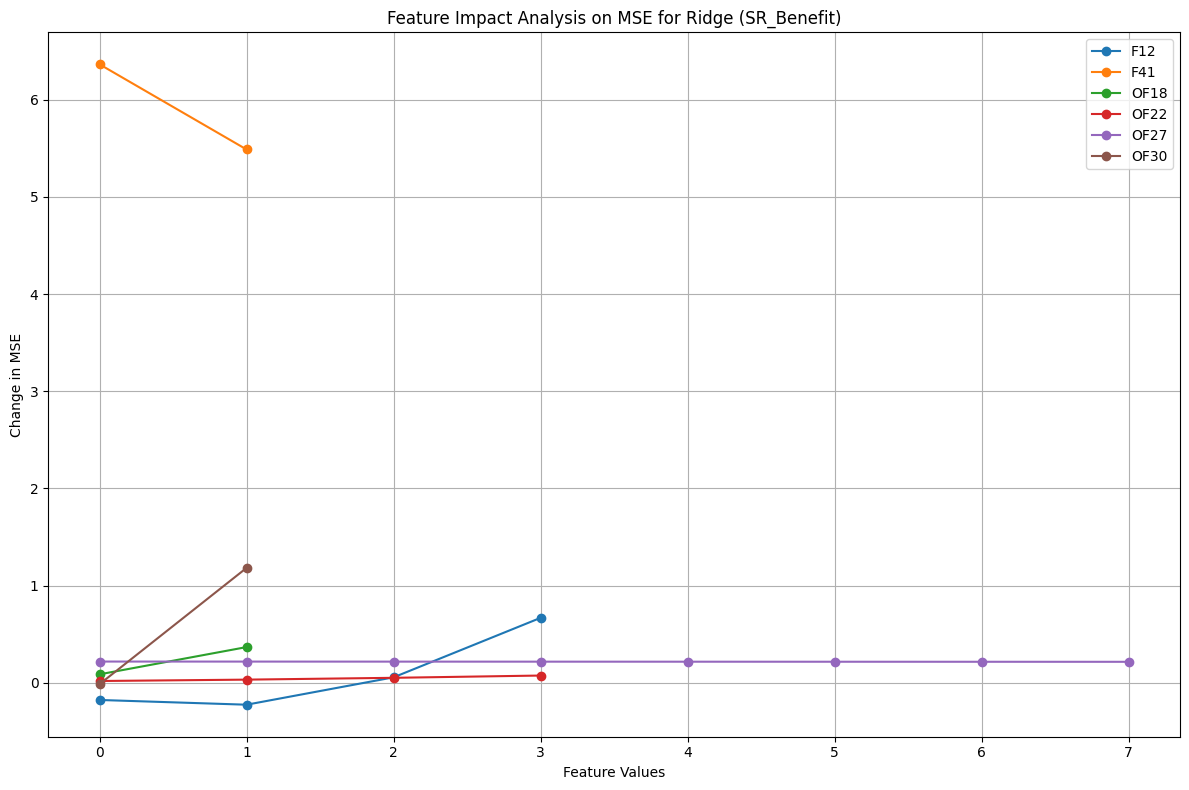

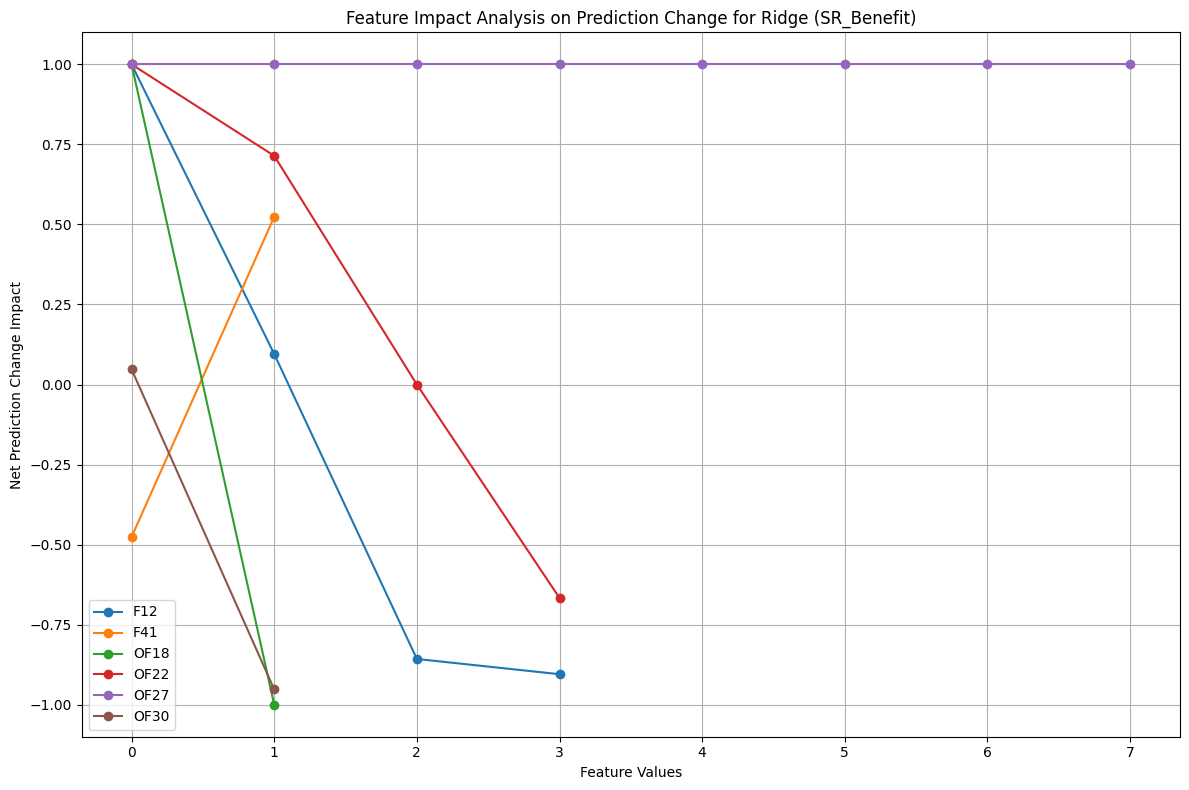

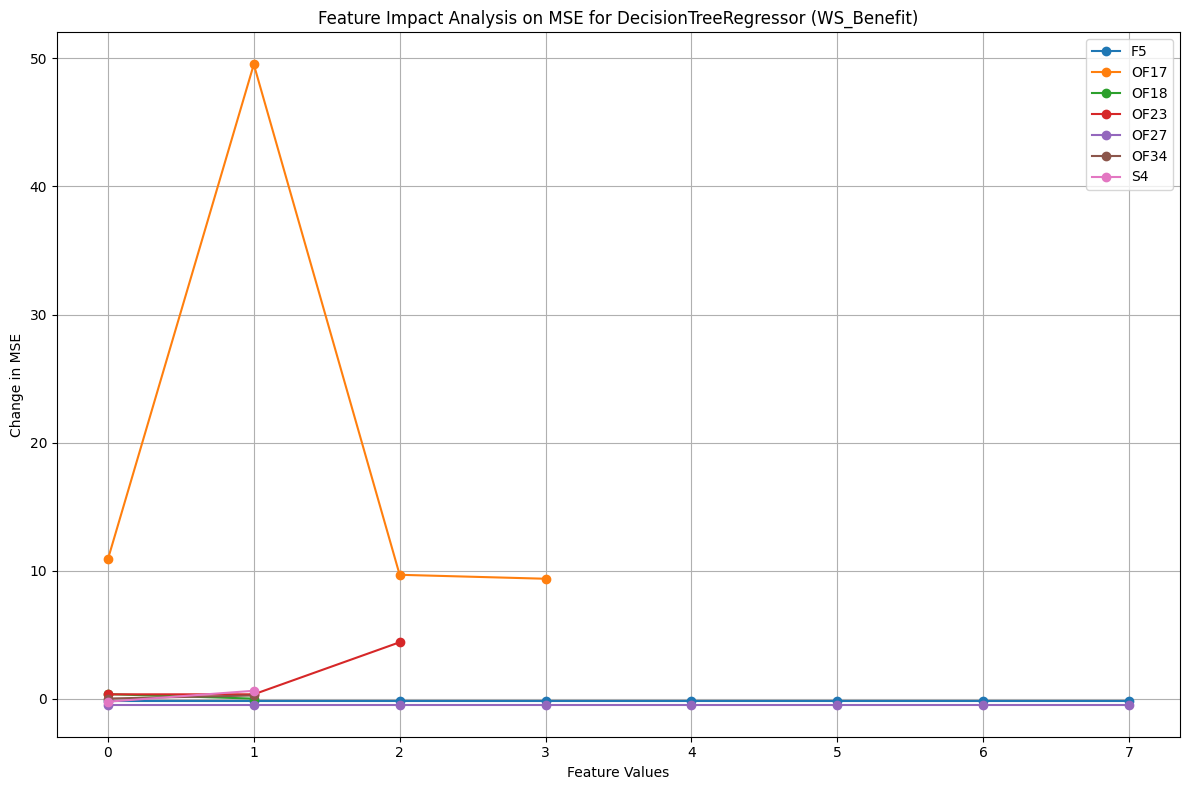

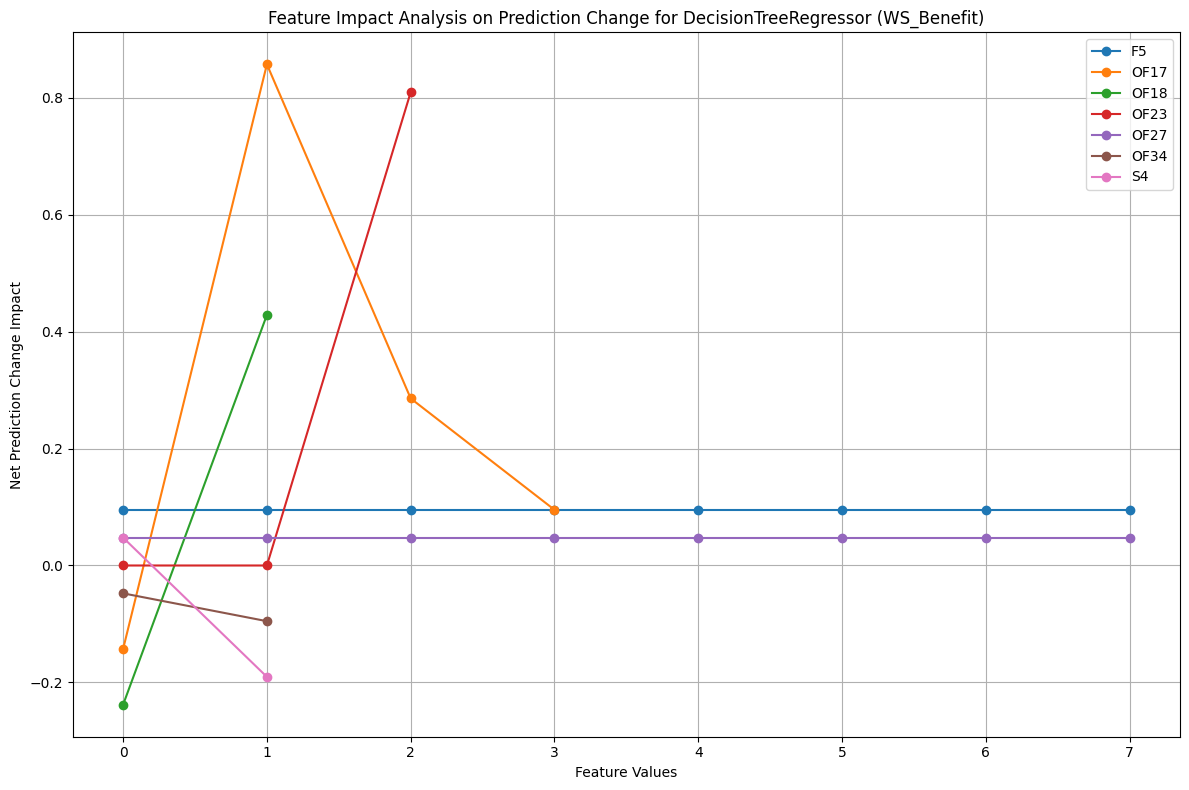

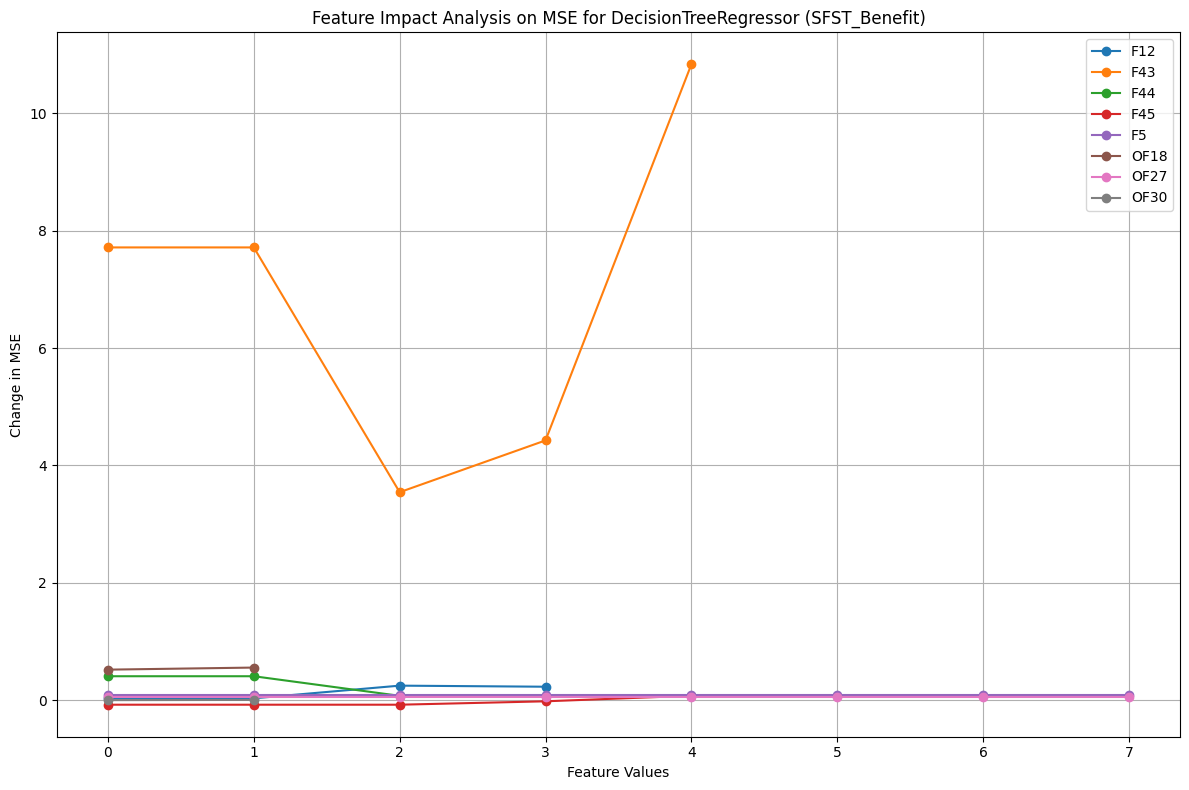

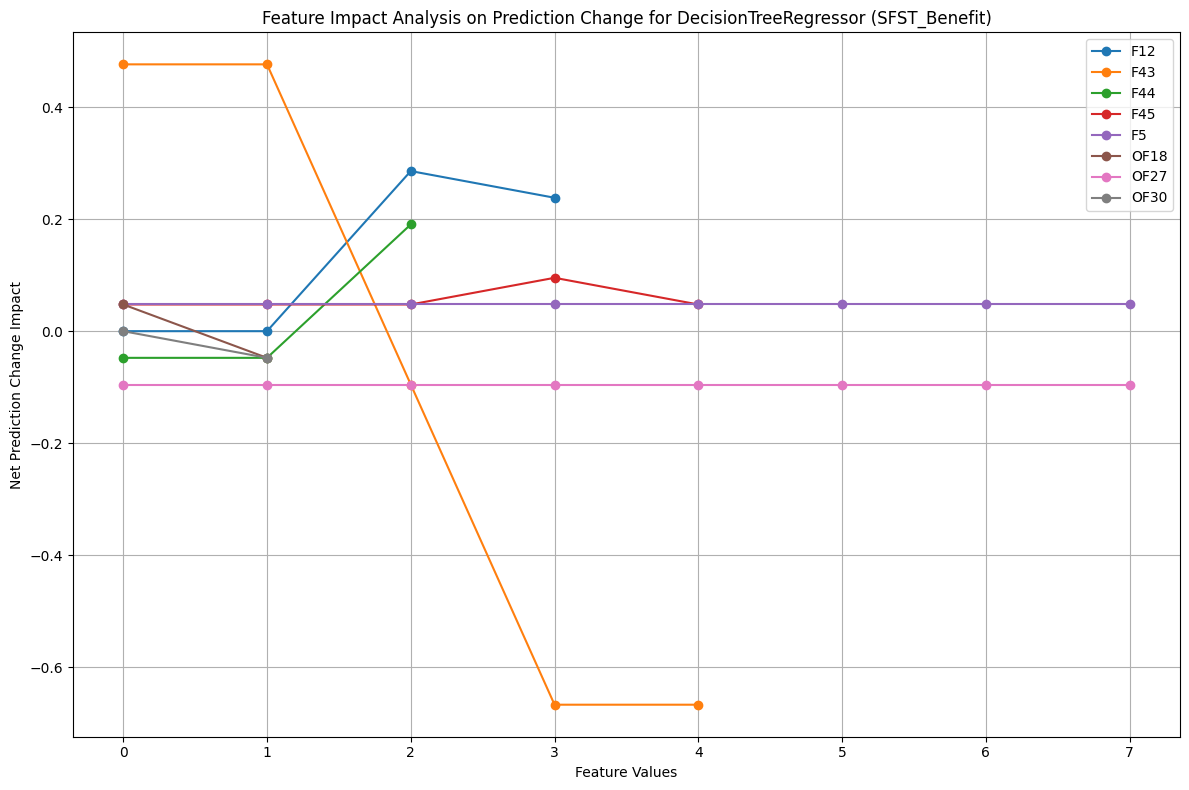

Feature impact analysis on MSE and prediction change completed and plots saved.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the configuration for each result column
configurations = {
    'PR': {
        'data_columns': ['F43', 'F44', 'F45', 'F5', 'OF18', 'OF27', 'OF34', 'S4'],
        'model': GradientBoostingRegressor,
        'hyperparameters': {
            'gradientboostingregressor__learning_rate': 0.01,
            'gradientboostingregressor__loss': 'squared_error',
            'gradientboostingregressor__n_estimators': 200,
            'gradientboostingregressor__warm_start': False
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_bfill_imputed.csv',
        'model_directory': 'PR'
    },
    'NR': {
        'data_columns': ['F43', 'F44', 'F45','F5', 'OF18', 'OF27','OF34', 'S4'],
        'model': MLPRegressor,
        'hyperparameters': {
            'mlpregressor__activation': 'tanh',
            'mlpregressor__hidden_layer_sizes': (50, 50, 50),
            'mlpregressor__learning_rate': 'invscaling',
            'mlpregressor__solver': 'lbfgs'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_iterative_imputed.csv',
        'model_directory': 'NR'
    },
    'SR': {
        'data_columns': ['F24', 'F28', 'F31', 'F43', 'F44', 'F45', 'F5', 'OF18', 'OF28'],
        'model': SGDRegressor,
        'hyperparameters': {
            'sgdregressor__learning_rate': 'optimal',
            'sgdregressor__loss': 'squared_error',
            'sgdregressor__penalty': 'elasticnet',
            'sgdregressor__warm_start': True
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_mean_imputed.csv',
        'model_directory': 'SR'
    },
    'WS': {
        'data_columns': ['F22', 'F31', 'F43', 'F44', 'F46', 'F5', 'OF18', 'OF27'],
        'model': GradientBoostingRegressor,
        'hyperparameters': {
            'gradientboostingregressor__learning_rate': 0.1,
            'gradientboostingregressor__loss': 'squared_error',
            'gradientboostingregressor__n_estimators': 200,
            'gradientboostingregressor__warm_start': True
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_bfill_imputed.csv',
        'model_directory': 'WS'
    },
    'SFST': {
        'data_columns': [ 'F43', 'F44', 'F45', 'F46', 'OF18', 'OF27'],
        'model': DecisionTreeRegressor,
        'hyperparameters': {
            'decisiontreeregressor__criterion': 'squared_error',
            'decisiontreeregressor__max_features': None,
            'decisiontreeregressor__min_samples_split': 5,
            'decisiontreeregressor__splitter': 'best'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_bfill_imputed.csv',
        'model_directory': 'SFST'
    },
    'PR_Benefit': {
        'data_columns': ['F14', 'F3_c', 'F41','F44', 'OF18', 'OF19', 'OF27'],
        'model': DecisionTreeRegressor,
        'hyperparameters': {
            'decisiontreeregressor__criterion': 'squared_error',
            'decisiontreeregressor__max_features': 'log2',
            'decisiontreeregressor__min_samples_split': 2,
            'decisiontreeregressor__splitter': 'random'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_iterative_imputed.csv',
        'model_directory': 'PR_Benefit'
    },
    'NR_Benefit': {
        'data_columns': ['F41','F5', 'OF10', 'OF18', 'OF22', 'OF27', 'OF30'],
        'model': SVR,
        'hyperparameters': {
            'svr__C': 10.0,
            'svr__degree': 1,
            'svr__gamma': 'scale',
            'svr__kernel': 'rbf'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_iterative_imputed.csv',
        'model_directory': 'NR_Benefit'
    },
    'SR_Benefit': {
        'data_columns': ['F12', 'F41', 'OF18', 'OF22', 'OF27','OF30'],
        'model': Ridge,
        'hyperparameters': {
            'ridge__alpha': 0.1,
            'ridge__solver': 'auto'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_iterative_imputed.csv',
        'model_directory': 'SR_Benefit'
    },
    'WS_Benefit': {
        'data_columns': ['F5', 'OF17', 'OF18', 'OF23', 'OF27', 'OF34', 'S4'],
        'model': DecisionTreeRegressor,
        'hyperparameters': {
            'decisiontreeregressor__criterion': 'squared_error',
            'decisiontreeregressor__max_features': None,
            'decisiontreeregressor__min_samples_split': 5,
            'decisiontreeregressor__splitter': 'random'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_iterative_imputed.csv',
        'model_directory': 'WS_Benefit'
    },
    'SFST_Benefit': {
        'data_columns': ['F12', 'F43', 'F44', 'F45', 'F5', 'OF18', 'OF27', 'OF30' ],
        'model': DecisionTreeRegressor,
        'hyperparameters': {
            'decisiontreeregressor__criterion': 'squared_error',
            'decisiontreeregressor__max_features': None,
            'decisiontreeregressor__min_samples_split': 3,
            'decisiontreeregressor__splitter': 'random'
        },
        'csv_file': '../../Data_ML/4_out_csvs_regression/output_bfill_imputed.csv',
        'model_directory': 'SFST_Benefit'
    }
}

# Create the directories if they don't exist
for config in configurations.values():
    if not os.path.exists(config['model_directory']):
        os.makedirs(config['model_directory'])

# Function to process the CSV file
def process_csv(result_column, config_key, config):
    data = pd.read_csv(config['csv_file'])
    X = data[config['data_columns']]
    y = data[result_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    pipeline = make_pipeline(StandardScaler(), config['model']())

    # Set hyperparameters directly in the model
    pipeline.set_params(**config['hyperparameters'])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{config['model'].__name__} MSE for {result_column}: {mse}")

    # Save the model
    model_filename = os.path.join(config['model_directory'], f"{os.path.basename(config['csv_file'])}_{config['model'].__name__}_model.pkl")
    joblib.dump(pipeline, model_filename)

    # Save the predictions and actual values
    results_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten(), 'Model': config['model'].__name__})
    results_filename = f"output_{os.path.basename(config['csv_file'])}_{result_column}.csv"
    results_df.to_csv(results_filename, index=False)

    return {
        'csv_file': os.path.basename(config['csv_file']),
        'model_name': config['model'].__name__,
        'hyperparameters': config['hyperparameters'],
        'mse': mse,
        'pipeline': pipeline,
        'X_test': X_test,
        'y_test': y_test,
        'config_key': config_key  # Store the configuration key
    }

# Process each configuration
best_models_info = []
for result_column, config_key in zip(configurations.keys(), configurations.keys()):
    best_model_info = process_csv(result_column, config_key, configurations[result_column])
    best_models_info.append(best_model_info)

# Save the best model information for each result column to a CSV file
best_models_df = pd.DataFrame(best_models_info)
best_models_df.to_csv("best_models_info_all.csv", index=False)

print("Best models information saved to best_models_info_all.csv")

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



# Define the possible values for each feature
feature_values = {
    'OF10': [0, 1, 2],   
    'OF17': [0, 1, 2, 3],
    'OF18': [0, 1],
    'OF19': [0, 1],
    'OF21': [0, 1, 2, 3],
    'OF22': [0, 1, 2, 3],
    'OF23': [0, 1, 2],
    'OF27': [0, 1, 2,3,4,5,6,7],
    'OF28': [0, 1, 2],
    'OF30': [0, 1],  
    'OF34': [0, 1],

    'F3_c': [0, 1, 2, 3, 4],
    'F12': [0, 1, 2, 3],
    'F14': [0, 1, 2, 3, 4],
    'F22': [0, 1, 2, 3, 4],
    'F24': [0, 1, 2, 3, 4, 5],
    'F28': [0, 1,2,3,4],
    'F31': [0, 1,2,3,4],
    
    'F35': [0, 1, 2, 3, 4],
    'F5': [0, 1,2,3,4,5,6,7],
    'F41': [0, 1],
    'F43': [0, 1, 2, 3, 4],
    'F44': [0, 1, 2],
    'F45': [0, 1, 2, 3, 4],
    'F46': [0, 1],
    'F49': [0, 1, 2, 3],

    'S4': [0, 1]
    
}

# Function to analyze feature impact on mean squared error
def analyze_feature_impact_on_mse(config, pipeline, X_test, y_test):
    impacts = {feature: [] for feature in config['data_columns']}
    original_mse = mean_squared_error(y_test, pipeline.predict(X_test))
    
    for feature in config['data_columns']:
        X_test_perturbed = X_test.copy()

        # Perturb the feature by its possible values
        for perturb in feature_values[feature]:
            X_test_perturbed[feature] = perturb
            y_pred_perturbed = pipeline.predict(X_test_perturbed)
            perturbed_mse = mean_squared_error(y_test, y_pred_perturbed)
            impacts[feature].append(perturbed_mse - original_mse)
    
    return impacts

# Function to analyze feature impact on prediction change
def analyze_feature_impact_on_prediction_change(config, pipeline, X_test, y_test):
    prediction_changes = {feature: [] for feature in config['data_columns']}
    original_predictions = pipeline.predict(X_test)
    
    for feature in config['data_columns']:
        X_test_perturbed = X_test.copy()

        # Perturb the feature by its possible values
        for perturb in feature_values[feature]:
            X_test_perturbed[feature] = perturb
            perturbed_predictions = pipeline.predict(X_test_perturbed)
            lower_percentage = np.mean(perturbed_predictions < original_predictions)
            higher_percentage = np.mean(perturbed_predictions > original_predictions)
            
            # Calculate net prediction change impact
            net_prediction_change = higher_percentage - lower_percentage
            prediction_changes[feature].append(net_prediction_change)
    
    return prediction_changes

# Analyze feature impacts and plot
colors = plt.cm.get_cmap('tab10', len(configurations))  # Get a colormap with a distinct color for each feature

for model_info in best_models_info:
    config = configurations[model_info['config_key']]
    mse_impacts = analyze_feature_impact_on_mse(config, model_info['pipeline'], model_info['X_test'], model_info['y_test'])
    prediction_change_impacts = analyze_feature_impact_on_prediction_change(config, model_info['pipeline'], model_info['X_test'], model_info['y_test'])

    # Plot the feature impacts on mean squared error
    plt.figure(figsize=(12, 8))
    for idx, feature in enumerate(config['data_columns']):
        plt.plot(feature_values[feature], mse_impacts[feature], marker='o', label=feature, color=colors(idx))
    plt.xlabel('Feature Values')
    plt.ylabel('Change in MSE')
    plt.title(f"Feature Impact Analysis on MSE for {model_info['model_name']} ({model_info['config_key']})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"feature_impact_mse_{model_info['config_key']}_{model_info['model_name']}.png")
    plt.show()

    # Plot the feature impacts on prediction change
    plt.figure(figsize=(12, 8))
    for idx, feature in enumerate(config['data_columns']):
        plt.plot(feature_values[feature], prediction_change_impacts[feature], marker='o', label=feature, color=colors(idx))
    plt.xlabel('Feature Values')
    plt.ylabel('Net Prediction Change Impact')
    plt.title(f"Feature Impact Analysis on Prediction Change for {model_info['model_name']} ({model_info['config_key']})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"feature_impact_prediction_change_{model_info['config_key']}_{model_info['model_name']}.png")
    plt.show()

print("Feature impact analysis on MSE and prediction change completed and plots saved.")
